### Understanding and Cleaning the Data

In [7]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Weather_modified.csv')

In [10]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Outlook      14 non-null object
Temp         14 non-null object
Humidity     14 non-null object
Windy        14 non-null bool
Play Golf    14 non-null object
dtypes: bool(1), object(4)
memory usage: 542.0+ bytes


In [11]:
# Let's understand the data, how it look like.
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [12]:
# check for missing values
df_1 = df.isnull().any()
df_1

Outlook      False
Temp         False
Humidity     False
Windy        False
Play Golf    False
dtype: bool

Now we can check the number of rows in df_1.

Now we have a clean dataframe which is ready for model building.<br>

In [13]:
# clean dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Outlook      14 non-null object
Temp         14 non-null object
Humidity     14 non-null object
Windy        14 non-null bool
Play Golf    14 non-null object
dtypes: bool(1), object(4)
memory usage: 542.0+ bytes


## Data Preparation

There are a number of preprocessing steps we need to do before building the model. 

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created **dummy variables** for categorical variables, since those models (being mathematical equations) can  process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the tree. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```. 

You can read the documentation of ```LabelEncoder``` <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">here</a>.





In [21]:
from sklearn.preprocessing import LabelEncoder
# apply Label encoder to df_categorical

le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Windy,Outlook,Temp,Humidity,Play Golf
0,0,1,1,0,0
1,1,1,1,0,0
2,0,0,1,0,1
3,0,2,2,0,1
4,0,2,0,1,1


In [16]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Windy,Outlook,Temp,Humidity,Play Golf
0,False,1,1,0,0
1,True,1,1,0,0
2,False,0,1,0,1
3,False,2,2,0,1
4,False,2,0,1,1


In [22]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Windy        14 non-null int64
Outlook      14 non-null int64
Temp         14 non-null int64
Humidity     14 non-null int64
Play Golf    14 non-null int64
dtypes: int64(5)
memory usage: 640.0 bytes


### Model Building and Evaluation

Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [23]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [24]:
# prepare input X
X = df.iloc[:,:-1]

# prepare response variable to y
y = df.iloc[:,-1]

In [25]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Windy,Outlook,Temp,Humidity
5,1,2,0,1
4,0,2,0,1
2,0,0,1,0
10,1,1,2,1
11,1,0,2,0


In [26]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Golf, dtype: int64

In [29]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(criterion='entropy')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.50      0.33         2

   micro avg       0.20      0.20      0.20         5
   macro avg       0.12      0.25      0.17         5
weighted avg       0.10      0.20      0.13         5



In [37]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[0 3]
 [1 1]]
0.2


<hr>

### Plotting the Decision Tree

To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```graphviz``` library to plot a tree.

In [33]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[:4])
features

['Windy', 'Outlook', 'Temp', 'Humidity']

**Note**:<br>
Python requires library pydot and an external software graphviz to visualize the decision tree. If you are on wondows, you'll need to specify the path for the pydot library to access dot file from graphviz.

Please read the downloadable instructions to install graphviz. For Mac users, one way is to:
- Install the python graphviz module: ```pip install graphviz```
- Then install the Graphviz software on Mac, you do this using homebrew:
    - Install homebrew: https://docs.brew.sh/Installation
    - ```brew install graphviz```

In [34]:
# If you're on windows:
# Specifing path for dot file.
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

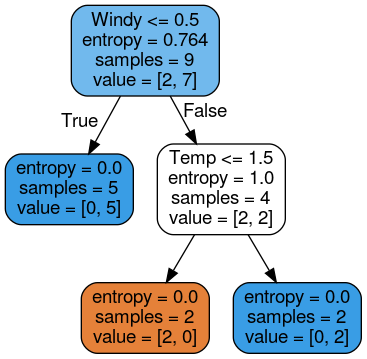

In [35]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>



<hr>

### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)

In [34]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 6)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 6)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [35]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001604,0.000545,0.666667,0.889286,1,{'max_depth': 1},4,0.5,0.857143,0.5,...,0.5,1.0,1.0,0.857143,1.0,0.875,0.000339,0.000141,0.235702,0.055787
1,0.001232,0.000388,0.555556,0.917857,2,{'max_depth': 2},5,0.5,0.857143,0.5,...,0.5,1.0,1.0,0.857143,0.0,0.875,0.000199,0.000080,0.283279,0.067386
2,0.001097,0.000351,0.777778,1.000000,3,{'max_depth': 3},1,1.0,1.000000,0.5,...,0.5,1.0,1.0,1.000000,1.0,1.000,0.000164,0.000081,0.248452,0.000000
3,0.000814,0.000270,0.777778,1.000000,4,{'max_depth': 4},1,1.0,1.000000,0.5,...,0.5,1.0,1.0,1.000000,1.0,1.000,0.000027,0.000006,0.248452,0.000000
4,0.001100,0.000411,0.777778,1.000000,5,{'max_depth': 5},1,1.0,1.000000,0.5,...,0.5,1.0,1.0,1.000000,1.0,1.000,0.000500,0.000282,0.248452,0.000000


Now let's visualize how train and test score changes with max_depth.

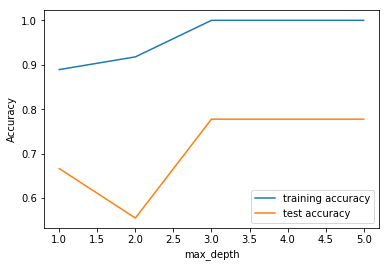

In [36]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

<hr>

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [37]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 10, 1)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001081,0.000347,0.777778,1.000000,1,{'min_samples_leaf': 1},1,1.0,1.000000,0.5,...,0.5,1.000000,1.0,1.000000,1.0,1.000,0.000091,0.000024,0.248452,0.000000
1,0.001287,0.000346,0.555556,0.889286,2,{'min_samples_leaf': 2},2,0.5,0.857143,0.5,...,0.5,1.000000,1.0,0.857143,0.0,0.875,0.000151,0.000039,0.283279,0.055787
2,0.001665,0.000474,0.555556,0.832143,3,{'min_samples_leaf': 3},2,0.5,0.857143,0.5,...,0.5,1.000000,0.5,0.571429,1.0,0.875,0.000528,0.000147,0.157135,0.140879
3,0.000972,0.000296,0.444444,0.557143,4,{'min_samples_leaf': 4},4,0.5,0.571429,0.5,...,0.5,0.571429,0.5,0.571429,0.0,0.500,0.000098,0.000020,0.157135,0.028571
4,0.000904,0.000273,0.444444,0.557143,5,{'min_samples_leaf': 5},4,0.5,0.571429,0.5,...,0.5,0.571429,0.5,0.571429,0.0,0.500,0.000116,0.000010,0.157135,0.028571


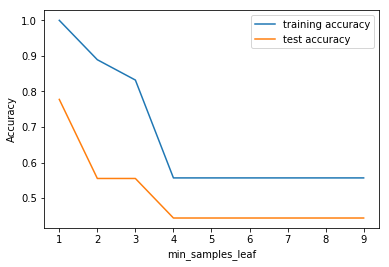

In [39]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

<hr>

### Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [41]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 5, 1)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001176,0.000366,0.777778,1.000000,2,{'min_samples_split': 2},1,1.0,1.000000,0.5,...,0.5,1.0,1.0,1.000000,1.0,1.000,0.000230,0.000032,0.248452,0.000000
1,0.001331,0.000406,0.555556,0.946429,3,{'min_samples_split': 3},2,0.5,0.857143,0.5,...,0.5,1.0,1.0,1.000000,0.0,0.875,0.000484,0.000084,0.283279,0.065854
2,0.001549,0.000522,0.555556,0.917857,4,{'min_samples_split': 4},2,0.5,0.857143,0.5,...,0.5,1.0,1.0,0.857143,0.0,0.875,0.000683,0.000236,0.283279,0.067386


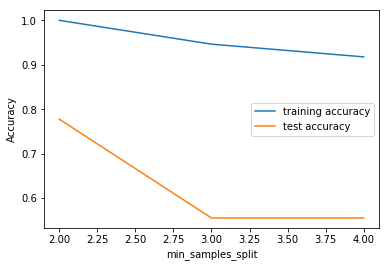

In [43]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [41]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [42]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.044453,0.001555,0.841804,0.843296,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.840360,0.842342,0.845097,0.841158,0.845334,0.847552,0.005908,0.000316,0.004273,0.002358
1,0.037790,0.001318,0.841804,0.843296,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.840360,0.842342,0.845097,0.841158,0.845334,0.847552,0.000252,0.000053,0.004273,0.002358
2,0.037244,0.001351,0.841614,0.843142,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.840360,0.842342,0.845097,0.841158,0.845808,0.846960,0.000304,0.000085,0.004241,0.002177
3,0.037571,0.001331,0.841614,0.843142,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.840360,0.842342,0.845097,0.841158,0.845808,0.846960,0.000203,0.000038,0.004241,0.002177
4,0.061962,0.001479,0.849903,0.854083,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",3,...,0.847229,0.854597,0.854334,0.852288,0.853861,0.855485,0.000503,0.000034,0.004545,0.001129
5,0.061456,0.001449,0.849903,0.854083,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",3,...,0.847229,0.854597,0.854334,0.852288,0.853861,0.855485,0.000492,0.000014,0.004545,0.001129
6,0.057400,0.001447,0.848956,0.851312,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.847466,0.852170,0.854098,0.850394,0.845571,0.850867,0.000717,0.000019,0.003752,0.000858
7,0.057355,0.001430,0.848956,0.851312,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.847466,0.852170,0.854098,0.850394,0.845571,0.850867,0.000448,0.000031,0.003752,0.000858
8,0.028683,0.001253,0.844409,0.846055,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",9,...,0.847466,0.849091,0.845097,0.841158,0.847466,0.849328,0.000258,0.000051,0.005279,0.003109
9,0.028928,0.001239,0.844409,0.846055,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",9,...,0.847466,0.849091,0.845097,0.841158,0.847466,0.849328,0.000163,0.000010,0.005279,0.003109


In [43]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8514659214701843
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


<hr>

**Running the model with best parameters obtained from grid search.**

In [44]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [45]:
# accuracy score
clf_gini.score(X_test,y_test)

0.850922753895458

In [46]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [47]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8393192617968837


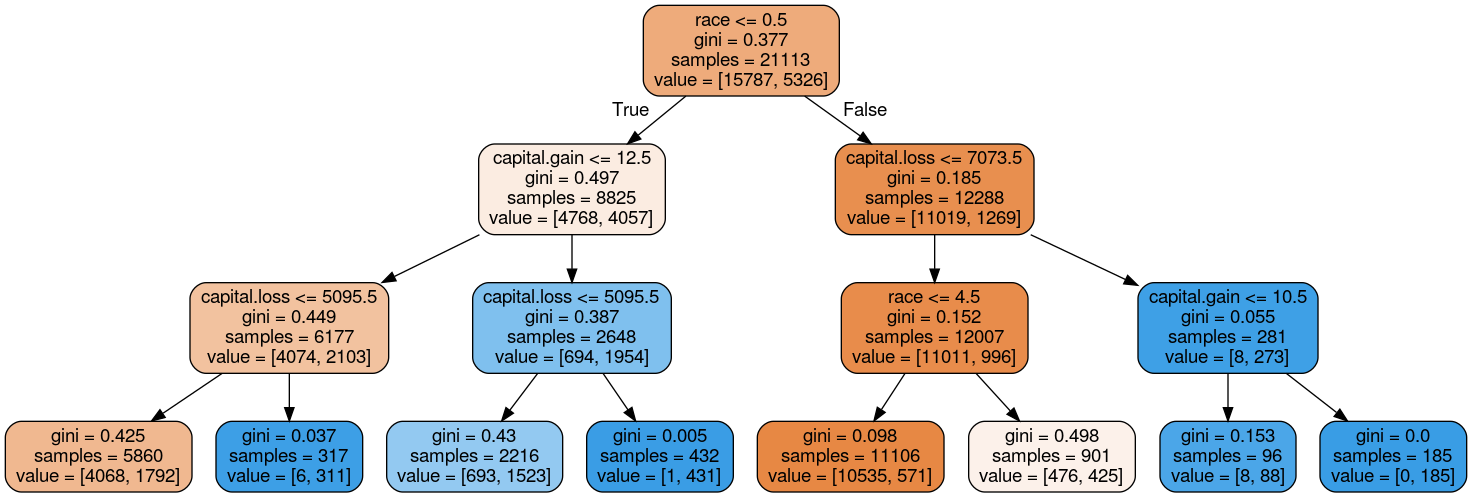

In [48]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [49]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.96      0.90      6867
          1       0.77      0.47      0.59      2182

avg / total       0.83      0.84      0.82      9049



In [50]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6564  303]
 [1151 1031]]


<hr>